In [1458]:
import pandas as pd
import numpy as np

In [1459]:
df = pd.read_csv(r"C:\Users\parag\Desktop\Loanpred.csv")

In [1460]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [1461]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1462]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1463]:
# Before fixing all the missing values lets just explore our data So data visualization is very effective method to get info from any kind of data. but before doing anything we have to think one thing..... What are we going to find???? Our findings will be:

In [1464]:
#so i first think for How many males or females apply for the loans?

In [1465]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [1466]:
import matplotlib.pyplot as plt

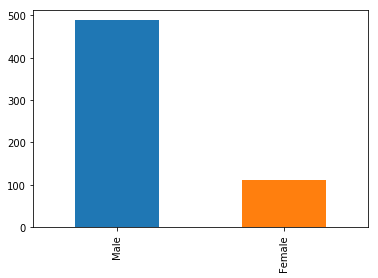

In [1467]:
df.Gender.value_counts().plot(kind='bar')

In [1468]:
df.Gender.value_counts(normalize= True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [1469]:
# so we got from above 80 applicants were male who apply for Loan
# lets see in graph format
# we got our first answer

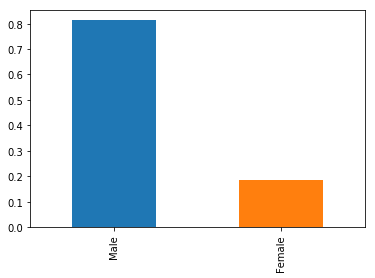

In [1470]:
df.Gender.value_counts(normalize= True).plot(kind='bar')

In [1471]:
# lets go for How many graduate or non-graduated male or female apply for the loan?

In [1472]:
df.groupby(['Gender', 'Education'])['Loan_Status'].count()

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
Name: Loan_Status, dtype: int64

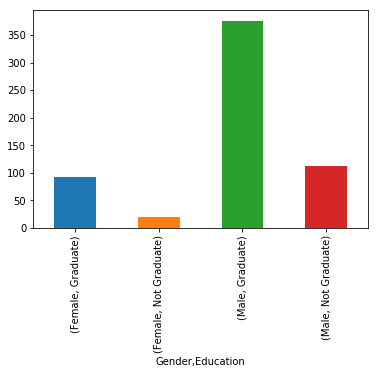

In [1473]:
df.groupby(['Gender', 'Education'])['Loan_ID'].count().plot(kind='bar')

In [1474]:
# now we see Is self employed people are most likely to get loan?

In [1475]:
df.groupby(['Self_Employed', 'Loan_Status'])["Loan_ID"].count()

Self_Employed  Loan_Status
No             N              157
               Y              343
Yes            N               26
               Y               56
Name: Loan_ID, dtype: int64

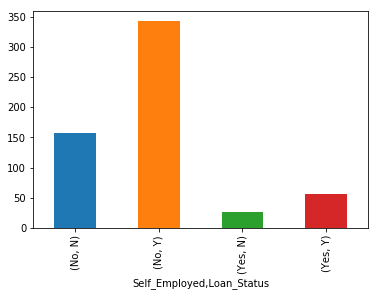

In [1476]:
df.groupby(['Self_Employed', 'Loan_Status'])["Loan_ID"].count().plot(kind='bar')

In [1477]:
#So we can see most of the approvals are in account of the persons who is not self employed.

In [1478]:
# now let's see which type of people apply for loan married or unmarried?

In [1479]:
df.groupby(["Married", "Loan_Status"])["Loan_ID"].count()

Married  Loan_Status
No       N               79
         Y              134
Yes      N              113
         Y              285
Name: Loan_ID, dtype: int64

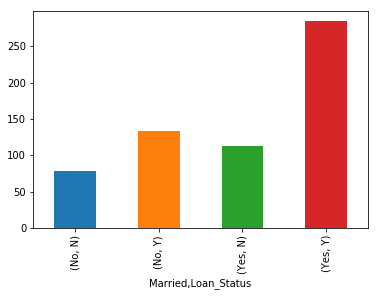

In [1480]:
df.groupby(["Married", "Loan_Status"])["Loan_ID"].count().plot(kind="bar")

In [1481]:
#are u remembered we left something, guess what??? 
# yeah u guess right, missing values

In [1482]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1483]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1484]:
#df_gen_dum = pd.get_dummies(df.Gender)

In [1485]:
# here is a catch we can't apply labelencoder on Gender column coz it have missing valuse and labelencoder can't work on missing valuse column
# Lets replace gender with most frequent or mode value as it is a categorical feature
mode_gen = df.Gender.value_counts().idxmax()## so we can see Male is the most common value so lets replace with it

In [1486]:
mode_gen

'Male'

In [1487]:
df.Gender.fillna(mode_gen , inplace=True)

In [1488]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1489]:
mode_mary = df.Married.value_counts().idxmax()

In [1490]:
mode_mary

'Yes'

In [1491]:
df.Married.fillna(mode_mary, inplace = True)

In [1492]:
mode_Dep = df.Dependents.value_counts().idxmax()

In [1493]:
mode_Dep

'0'

In [1494]:
df.Dependents.fillna(mode_Dep, inplace= True)

In [1495]:
mode_self = df.Self_Employed.value_counts().idxmax()


In [1496]:
mode_self

'No'

In [1497]:
df.Self_Employed.fillna(mode_self, inplace= True)

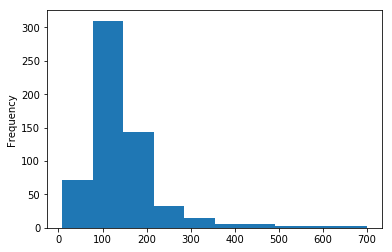

In [1498]:
df.LoanAmount.plot("hist")

In [1499]:
df.LoanAmount.mean()

146.41216216216216

In [1500]:
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)

In [1501]:
df.Loan_Amount_Term.value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [1502]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.value_counts().idxmax(), inplace=True)


In [1503]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [1504]:
df.Credit_History.fillna(df.Credit_History.value_counts().idxmax(), inplace=True)

In [1505]:
df.isnull().sum() # so now finally we have replaced all the missing values.


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1506]:
dummy_gen = pd.get_dummies(df.Gender)

In [1507]:
dummy_gen.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [1508]:
df = pd.concat([dummy_gen, df], axis=1)

In [1509]:
df.head()

,Female,Male,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,1,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,1,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1510]:
#Also here is one more problem. As we can see MAle & Female column are anti. Mean If Female =1 Then Male =0 vice versa. So we have to do delete one otherwise we will face dummy variable trap. So lets delete Female & Gender column 
df.drop(["Female", "Gender"], axis =1, inplace= True)

In [1511]:
df.head()

,Male,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1512]:
# now notice if we convert married column & Self_Employed  Column to dummy variable, 
# We will get same column name so it will be a problem & confusing.
df.Married.replace("No", "Unmarried", inplace=True)
df.Married.replace("Yes", "Married", inplace=True)

In [1513]:
df.Self_Employed.replace("Yes", "Job", inplace= True)
df.Self_Employed.replace("No", "Business", inplace= True)

In [1514]:
df.head()

,Male,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001002,Unmarried,0,Graduate,Business,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,LP001003,Married,1,Graduate,Business,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,LP001005,Married,0,Graduate,Job,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,LP001006,Married,0,Not Graduate,Business,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,LP001008,Unmarried,0,Graduate,Business,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1515]:
dummy_mary = pd.get_dummies(df.Married)
df.drop(["Married"], axis= 1, inplace= True)

In [1516]:
df = pd.concat([dummy_mary, df], axis= 1)

In [1517]:
df.head()

,Married,Unmarried,Male,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,LP001002,0,Graduate,Business,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,0,1,LP001003,1,Graduate,Business,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,0,1,LP001005,0,Graduate,Job,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,0,1,LP001006,0,Not Graduate,Business,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,1,1,LP001008,0,Graduate,Business,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1518]:
df.drop(["Unmarried"], axis= 1, inplace= True)

In [1519]:
dummy_edu = pd.get_dummies(df.Education)

In [1520]:
dummy_edu.head()

,Graduate,Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [1521]:
df = pd.concat([dummy_edu, df], axis= 1)

In [1522]:
df.head()

,Graduate,Not Graduate,Married,Male,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,LP001002,0,Graduate,Business,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,0,1,1,LP001003,1,Graduate,Business,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,0,1,1,LP001005,0,Graduate,Job,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,1,1,1,LP001006,0,Not Graduate,Business,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,1,LP001008,0,Graduate,Business,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1523]:
df.drop(["Not Graduate", "Education"], axis= 1, inplace= True)

In [1524]:
df.head()

,Graduate,Married,Male,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,LP001002,0,Business,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,LP001003,1,Business,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,1,LP001005,0,Job,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,1,1,LP001006,0,Business,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,1,LP001008,0,Business,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1525]:
dummy_self = pd.get_dummies(df.Self_Employed)

In [1526]:
df = pd.concat([dummy_self, df], axis= 1)

In [1527]:
df.head()

,Business,Job,Graduate,Married,Male,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,1,LP001002,0,Business,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,0,1,1,1,LP001003,1,Business,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,1,1,1,1,LP001005,0,Job,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,0,0,1,1,LP001006,0,Business,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,1,0,1,LP001008,0,Business,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1528]:
df.drop(["Self_Employed", "Business"], axis=1, inplace=True)

In [1529]:
df.head()

,Job,Graduate,Married,Male,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,1,LP001002,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,0,1,1,1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,1,1,LP001005,0,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,0,1,1,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,1,0,1,LP001008,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1530]:
dummy_pro = pd.get_dummies(df.Property_Area)

In [1531]:
df = pd.concat([dummy_pro, df], axis=1)

In [1532]:
df.head()

,Rural,Semiurban,Urban,Job,Graduate,Married,Male,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,1,0,1,LP001002,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,0,0,0,1,1,1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,0,1,1,1,1,1,LP001005,0,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,0,1,0,0,1,1,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,0,1,0,1,0,1,LP001008,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1533]:
df.drop(["Rural", "Property_Area"], axis=1, inplace=True)

In [1534]:
df.head()

,Semiurban,Urban,Job,Graduate,Married,Male,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,0,1,LP001002,0,5849,0.0,146.412162,360.0,1.0,Y
1,0,0,0,1,1,1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,N
2,0,1,1,1,1,1,LP001005,0,3000,0.0,66.000000,360.0,1.0,Y
3,0,1,0,0,1,1,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Y
4,0,1,0,1,0,1,LP001008,0,6000,0.0,141.000000,360.0,1.0,Y


In [1535]:
# one more problem i just found in dependent column
df.Dependents.value_counts() # you can see there is 3+ vlaue which is string. So lets change it with 3

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1536]:
df.Dependents.replace("3+", 3, inplace=True) 
df.Dependents =df.Dependents.astype("int")  # change the column type to integer


In [1537]:
df.Dependents.value_counts()


0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [1538]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [1539]:
x = df.drop(['Loan_Status'], 1)
y = df["Loan_Status"]
# x = df.iloc[:, 0:-1].values
# y = df.iloc[:, -1].values

In [1540]:
x

,Semiurban,Urban,Job,Graduate,Married,Male,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,0,1,0,5849,0.0,146.412162,360.0,1.0
1,0,0,0,1,1,1,1,4583,1508.0,128.000000,360.0,1.0
2,0,1,1,1,1,1,0,3000,0.0,66.000000,360.0,1.0
3,0,1,0,0,1,1,0,2583,2358.0,120.000000,360.0,1.0
4,0,1,0,1,0,1,0,6000,0.0,141.000000,360.0,1.0
5,0,1,1,1,1,1,2,5417,4196.0,267.000000,360.0,1.0
6,0,1,0,0,1,1,0,2333,1516.0,95.000000,360.0,1.0
7,1,0,0,1,1,1,3,3036,2504.0,158.000000,360.0,0.0
8,0,1,0,1,1,1,2,4006,1526.0,168.000000,360.0,1.0
9,1,0,0,1,1,1,1,12841,10968.0,349.000000,360.0,1.0


In [1541]:
y

0      Y
1      N
2      Y
3      Y
4      Y
5      Y
6      Y
7      N
8      Y
9      N
10     Y
11     Y
12     Y
13     N
14     Y
15     Y
16     Y
17     N
18     N
19     Y
20     N
21     Y
22     N
23     N
24     N
25     Y
26     Y
27     Y
28     N
29     Y
      ..
584    N
585    N
586    Y
587    Y
588    Y
589    N
590    Y
591    N
592    Y
593    Y
594    Y
595    Y
596    N
597    N
598    Y
599    Y
600    N
601    Y
602    Y
603    Y
604    Y
605    N
606    Y
607    Y
608    Y
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [1542]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [1543]:
le = LabelEncoder()

In [1544]:
y = le.fit_transform(y)

In [1545]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [1546]:
# now scaling means every data is in same range. But if you see continoues variables in our dataset. ApplicantIncome has a huge
# range if you compare to CoapplicantIncome & LoanAmount. So it is better to scale them to the same range.


In [1547]:
from sklearn.preprocessing import StandardScaler
scaler_ApplicantIncome = StandardScaler()
x = scaler_ApplicantIncome.fit_transform(x)

C:\Users\parag\ana\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\parag\ana\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1548]:
x

array([[-0.7820157 ,  1.42814704, -0.39260074, ...,  0.        ,
         0.2732313 ,  0.41173269],
       [-0.7820157 , -0.70020801, -0.39260074, ..., -0.21927331,
         0.2732313 ,  0.41173269],
       [-0.7820157 ,  1.42814704,  2.54711697, ..., -0.957641  ,
         0.2732313 ,  0.41173269],
       ...,
       [-0.7820157 ,  1.42814704, -0.39260074, ...,  1.26937121,
         0.2732313 ,  0.41173269],
       [-0.7820157 ,  1.42814704, -0.39260074, ...,  0.4833669 ,
         0.2732313 ,  0.41173269],
       [ 1.2787467 , -0.70020801,  2.54711697, ..., -0.15972753,
         0.2732313 , -2.42876026]])

In [1558]:
from sklearn.model_selection import train_test_split as tts 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [1559]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\parag\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1561]:
y_pred = logreg.predict(x_test)


In [1562]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [1563]:
logreg.score(x_test, y_test)

0.7837837837837838

In [1564]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 27  38]
 [  2 118]]


In [1566]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
Actual,,,
0,27,38,65
1,2,118,120
All,29,156,185


In [1565]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

   micro avg       0.78      0.78      0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

